<a href="https://colab.research.google.com/github/Harithelamin/DL/blob/main/last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
print(np.version)
print("Hello")
import keras
print(keras.__version__)

<module 'numpy.version' from 'c:\\Users\\Harith\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\numpy\\version.py'>
Hello
3.3.3


In [47]:
# Define data path 

data_dir =r"input/mushrooms/train"
train_data = r"input/mushrooms/train"
validate_data =  r"input/mushrooms/train"
test_data =  r"input/mushrooms/train"
test_data =  r"input/mushrooms/Test/"
test_image = r"input/mushrooms/test/test.jpg"

In [5]:
# Hiberparamaters
image_size = 72
target_size = (32, 32)
input_shape = (32, 32, 3)
num_classes = 2

batch_size = 256 #128
seed= 42
learning_rate = 0.001
weight_decay = 0.0001
num_epochs = 10 
# We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size  // patch_size) ** 2
projection_dim = 64
num_heads = 4
# Size of transformer layers
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  
# Size of the dense layers
transformer_layers = 8
mlp_head_units = [
    2048,
    1024,
] 

In [7]:
# Setup
from keras.src.legacy.preprocessing.image import ImageDataGenerator

# Load the training and validation datasets
data_generator = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2)

def dataGenerator(directory, target_size, batch_size, seed):
    generator = data_generator.flow_from_directory(
        directory,
        target_size= target_size,
        batch_size=batch_size,
        shuffle=True,
        class_mode='categorical',
        seed=seed,
        subset='training')
    return generator



In [48]:
# Data generator from directory
train_generator= dataGenerator(train_data, target_size, batch_size, seed)
validate_generator= dataGenerator(validate_data, target_size, batch_size, seed)
test_generator= dataGenerator(test_data, target_size, batch_size, seed)

Found 1601 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.


In [14]:
def split_data(train_generator,validate_generator ):
    X_train, y_train = next(train_generator)
    X_test, y_test = next(validate_generator)
    return X_train, y_train, X_test, y_test

In [16]:
# Split data
import scipy
X_train, y_train, X_test, y_test=split_data(train_generator, validate_generator)
print(f"x_train shape: {X_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {X_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (256, 32, 32, 3) - y_train shape: (256, 2)
x_test shape: (256, 32, 32, 3) - y_test shape: (256, 2)


In [18]:
# Setup

from keras.src import Sequential
#from keras.layers import MaxPooling2D, Conv2D, Dense
from keras import MaxPooling2D, Conv2D, Dense


def define_model():
    model = Sequential([
    Conv2D(filters=32,
           input_shape=(10,10,3),
           kernel_size=(4,4),
           activation='relu'),

    MaxPooling2D(pool_size=(2, 2)),


    Dense(2),
    ])
    return model
    

In [35]:
# Setup
from keras.src import Sequential
from keras.layers import MaxPooling2D, Conv2D, Dense, Flatten, Dropout, LeakyReLU


def discriminator(in_shape=(28,28,1)):
 model = Sequential()
 model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
 model.add(LeakyReLU(alpha=0.2))
 model.add(Dropout(0.4))
 model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
 model.add(LeakyReLU(alpha=0.2))
 model.add(Dropout(0.4))
 model.add(Flatten())
 model.add(Dense(1, activation='sigmoid'))
 # compile model
 #opt = Adam(lr=0.0002, beta_1=0.5)
 #model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
 return model
 

In [22]:
# Define model
import warnings
warnings.filterwarnings('ignore')
#model = define_model()
model = discriminator()

In [23]:
# Model summery
model.summary()


# Model Compiler
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         3,137 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,705 (159.00 KB)

 Trainable params: 40,705 (159.00 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
from keras import Model, layers
#from keras.layers import Add, Dense, Dropout, Embedding, GlobalAveragePooling1D, Input, Layer, LayerNormalization, MultiHeadAttention
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(X_train)

In [28]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=keras.activations.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [30]:
from keras import ops
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        input_shape = ops.shape(images)
        batch_size = input_shape[0]
        height = input_shape[1]
        width = input_shape[2]
        channels = input_shape[3]
        num_patches_h = height // self.patch_size
        num_patches_w = width // self.patch_size
        patches = keras.ops.image.extract_patches(images, size=self.patch_size)
        patches = ops.reshape(
            patches,
            (
                batch_size,
                num_patches_h * num_patches_w,
                self.patch_size * self.patch_size * channels,
            ),
        )
        return patches

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config

In [31]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = ops.expand_dims(
            ops.arange(start=0, stop=self.num_patches, step=1), axis=0
        )
        projected_patches = self.projection(patch)
        encoded = projected_patches + self.position_embedding(positions)
        return encoded

    def get_config(self):
        config = super().get_config()
        config.update({"num_patches": self.num_patches})
        return config  

In [33]:
def create_vit_classifier():
    inputs = keras.Input(shape=input_shape)
    print("input")
    print(input)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    print("okkkk")
    return model


In [37]:
# CONFUTION MATRIX
# DROP MATIRIX SHOULD BE 80%
# lambda???

2.16.1
starting wtih vit model
input
<bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x000001DB7A493170>>

okkkk
vit summary


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ data_augmentation   │ (None, 72, 72, 3) │          7 │ input_layer_2[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patches (Patches)   │ (None, 144, 108)  │          0 │ data_augmentatio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder       │ (None, 144, 64)   │     16,192 │ patches[0][0]     │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 144, 64)   │        128 │ patch_encoder[0]… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 144, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 144, 64)   │          0 │ multi_head_atten… │
│                     │                   │            │ patch_encoder[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 144, 128)  │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 144, 128)  │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 144, 64)   │      8,256 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 144, 64)   │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 144, 64)   │          0 │ dropout_6[0][0],  │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 144, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 144, 64)   │          0 │ multi_head_atten… │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 144, 128)  │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 144, 128)  │          0 │ dense_5[0][0]   

 Total params: 21,658,569 (82.62 MB)

 Trainable params: 21,658,562 (82.62 MB)

 Non-trainable params: 7 (32.00 B)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5909 - loss: 1.2909
Epoch 1: val_accuracy improved from -inf to 0.79138, saving model to ./model.hdf5.weights.h5
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 8s/step - accuracy: 0.6001 - loss: 1.2691 - val_accuracy: 0.7914 - val_loss: 0.5280
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7071 - loss: 0.8391
Epoch 2: val_accuracy improved from 0.79138 to 0.81574, saving model to ./model.hdf5.weights.h5
7/7 ━━━━━━━━━━━━━━━━━━━━ 54s 8s/step - accuracy: 0.7107 - loss: 0.8326 - val_accuracy: 0.8157 - val_loss: 0.5207
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7645 - loss: 0.7121
Epoch 3: val_accuracy did not improve from 0.81574
7/7 ━━━━━━━━━━━━━━━━━━━━ 52s 7s/step - accuracy: 0.7648 - loss: 0.7090 - val_accuracy: 0.8107 - val_loss: 0.4866
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7879 - loss: 0.6764
Epoch 4: val_accuracy improved from 0.81574 to 0.82511, saving model to ./model.hdf5.weights.h5
7

Text(0.5, 1.0, 'Training and Validation Accuracy')

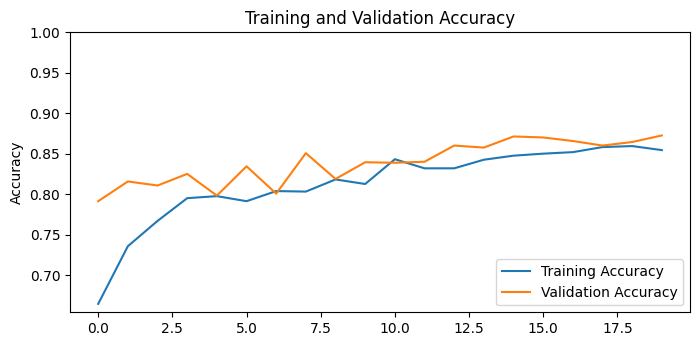

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint

print(tf.__version__)
print("starting wtih vit model")
model = create_vit_classifier()
print("vit summary")
model.summary()
#create callback
filepath = 'my_best_model.hdf5.keras'
# autosave best Model
#best_model_file = "model.h5.keras"
# model.save_weights('model_saved.h5')
# from keras import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint(filepath = './model.hdf5.weights.h5',
                                                  monitor = 'val_accuracy', 
                                                  verbose = 1, 
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  mode = 'max')
# early stop
from keras import *
earlystop = EarlyStopping(monitor = 'val_accuracy',
                                                 min_delta = 1e-4,
                                                 patience = 5,
                                                 mode = 'max',
                                                 restore_best_weights = True,
                                                 verbose = 1)

callbacks = [earlystop, checkpoint]



# Compile the Model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the Model
history = model.fit(train_generator, epochs=20,validation_data=validate_generator, 
                    callbacks=[callbacks]
                    )

# Evaluate the Model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = model.predict(X_test)

cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm).plot()

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [50]:
#Confusion Matrix and Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Y_pred = model.predict_generator(validate_generator, nb_validation_samples= 7 // 
batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validate_generator.classes, y_pred))

print('Classification Report')
target_names = ['P', 'E']
print(classification_report(validate_generator.classes, y_pred, target_names=target_names))

AttributeError: 'Functional' object has no attribute 'predict_generator'

In [45]:
#https://www.datacamp.com/tutorial/what-is-a-confusion-matrix-in-machine-learning
#Predict


import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Predict on the Test Data
y_pred = model.predict(X_test)
y_pred = np.argmax (y_pred, axis = 1)

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_pred , normalize='pred')

# Generate the confusion matrix
#cm = confusion_matrix(y_test, y_pred)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets